#En cas de non-fonctionnement chez le correcteur
L'output de la cellule suivante contient les versions de toutes les librairies installées sur le système utilisé pour faire le TP.
Si le correcteur rencontrait un problème à l'exécution, merci de vérifier que pour les librairies concernées par ce travail, les versions sont cohérentes.

In [1]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.5.30
cffi==1.14.6
cftime==1.5.1
chardet==3.0.4
charset-normalizer==2.0.6
clang==5.0
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed=

#EXERCICE 1
Autant que possible, pour faciliter la lecture, nous arrondirons les floats à 5 décimales. 

##QUESTION 1

In [2]:
#QUESTION 1)

import pandas as pd 

df = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", sep=" ")
display(df.head())

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


##QUESTION 2

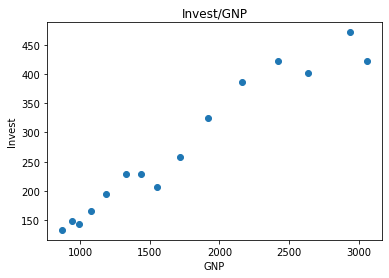

In [3]:
#QUESTION 2)

import matplotlib.pyplot as plt

plt.scatter(data=df, x="gnp", y="invest")
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.title("Invest/GNP")
plt.show()

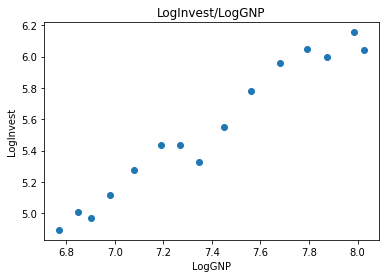

In [4]:
#QUESTION 2) suite

import numpy as np

df["loggnp"] = np.log(df["gnp"])
df["loginvest"] = np.log(df["invest"])

#la visualisation n'est pas demandée mais facilite la compréhension de l'utilisation du log
plt.scatter(data=df, x="loggnp", y="loginvest")
plt.xlabel("LogGNP")
plt.ylabel("LogInvest")
plt.title("LogInvest/LogGNP")
plt.show()

##QUESTION 3
D'après le cours on a dans le cas unidimensionnel :
$$
\hat{\theta}_{0}=\bar{y}_{n}-\hat{\theta}_{1} \bar{x}_{n}, \quad \hat{\theta}_{1}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}_{n}\right)\left(y_{i}-\bar{y}_{n}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}_{n}\right)^{2}}
$$
et le coefficient de détermination R2 :
$$
R^{2}=\frac{\sum_{i=1}^{n}\left(\hat{y}_{i}-\bar{y}_{n}\right)^{2}}{\sum_{i=1}^{n}\left(y_{i}-\bar{y}_{n}\right)^{2}}=\frac{\left\|\hat{Y}-\bar{y}_{n} \mathbf{1}_{n}\right\|^{2}}{\left\|Y-\bar{y}_{n} \mathbf{1}_{n}\right\|^{2}}
$$
L'exercice 12 nous donne aussi dans le cas unidimensionnel : 
$$
\mathbb{V}\left[\hat{\beta}_{0}\right]=\hat{\sigma}^{2}\left(\frac{1}{n}+\frac{\bar{x}^{n 2}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}^{n}\right)^{2}}\right) \quad \text { et } \quad \mathbb{V}\left[\hat{\beta}_{1}\right]=\frac{\hat{\sigma}^{2}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}^{n}\right)^{2}}
$$
avec :
$$
\widehat{\sigma}^{2}=\frac{1}{n-2} \sum_{i=1}^{n}\left(Y_{i}-\left(\hat{\beta}_{0}+\hat{\beta}_{1} x_{i}\right)\right)^{2}
$$

In [5]:
#QUESTION 3)

x = df["loggnp"].values #on assigne à x les valeurs de la variable explicative au format np.array
y = df["loginvest"].values #on assigne à y les valeurs de la variable à expliquer au format np.array

n = len(x) #on assigne à n la valeur du nombre d'observations 

x_bar = x.mean() #moyenne de x
y_bar = y.mean() #moyenne de y

theta1 = np.sum((x-x_bar)*(y-y_bar))/np.sum((x-x_bar)**2) #estimation de theta1 (ou beta1)
theta0 = y_bar - theta1 * x_bar #estimation de theta0 (ou beta0)

y_hat = theta0 + theta1 * x #estimation des y à partir des theta

var_res = np.sum((y-y_hat)**2)/(n-2) #estimation de la variance des résidus
var_theta0 = var_res * (1/n + x_bar**2/np.sum((x-x_bar)**2)) #estimation de la variance de theta0
var_theta1 = var_res/np.sum((x-x_bar)**2) #estimation de la variance de theta1
sigma_theta0 = var_theta0**.5 #l'écart-type vaut la racine de la variance
sigma_theta1 = var_theta1**.5

R2 = np.sum((y_bar-y_hat)**2)/np.sum((y_bar-y)**2) #R2 == coefficient de détermination

print("Estimateur des moindres carrés :")
print()
print(f"Intercept (beta0) et coefficient (beta1) estimés : {theta0:.5f}, {theta1:.5f}")
print(f"Écart-type des coefficients estimés : {sigma_theta0:.5f}, {sigma_theta1:.5f}")
print(f"R2 estimé : {R2:.5f}")

Estimateur des moindres carrés :

Intercept (beta0) et coefficient (beta1) estimés : -1.96359, 1.01528
Écart-type des coefficients estimés : 0.40955, 0.05538
R2 estimé : 0.96276


##QUESTION 4
D'après la proposition 9 du cours on a notre statistique de test :
$$
\widehat{T}_{k}=\left(\frac{n^{1 / 2}}{\sqrt{s_{k}^{2} \hat{\sigma}^{2}}}\right)\left|\widehat{\theta_{k}}\right|
$$
Avec :
$$
s^2_k = \hat{G}^{-1}_{kk}, \hat{G} = \frac{Z^TZ}{n}
$$
La p-valeur est définie comme le alpha maximal tel qu'on rejette l'hypothèse nulle :
$$
t_n = Q_{n-p-1}(1-p/2) \\
\Leftrightarrow  p = 2(1-Q^{-1}_{n-p-1}(t_n))
$$

In [6]:
#QUESTION 4)

from scipy import stats

#Passage au format algébrique pour respecter plus facilement les formules du cours
Z = np.array((np.ones(len(x)),x)).T
theta_hat = np.array((theta0, theta1))

t_hat = (n**.5/(np.diag(np.linalg.inv((Z.T@Z)/n))[1]*var_res)**.5)*np.abs(theta1) #d'après ci-dessus

print(f"Valeur de la statistique de test : {t_hat:.5f}")
print(f"p-valeur : {(stats.t.sf(t_hat, n-2))*2:.5e}") 
print(f"La pente est significative (risque d'erreur lors du rejet de H0 = {(stats.t.sf(t_hat, n-2))*2:.5e}).")
#la fonction de densité cumulée == Q^-1 par définition, et sf = 1 - cdf
#on utilise sf plutôt que 1-cdf car sf est plus précise selon la documentation de scipy

Valeur de la statistique de test : 18.33198
p-valeur : 1.13637e-10
La pente est significative (risque d'erreur lors du rejet de H0 = 1.13637e-10).


##QUESTION 5
D'après 3.3.1 dans le cours, sachant $z$ une nouvelle observation, on a $CI(z)$:
$$
\mathrm{CI}(z)=z^{T} \hat{\theta} \pm t_{n-p-1}(1-\alpha / 2) \widehat{\sigma} \sqrt{z^{T}\left(Z^{T} Z\right)^{-1} z}
$$
et $PI(z)$ :
$$
\operatorname{PI}(z)=z^{T} \widehat{\theta}_{n} \pm t_{n-p-1}(1-\alpha / 2) \widehat{\sigma} \sqrt{1+z^{T}\left(Z^{T} Z\right)^{-1} z}
$$

In [7]:
#QUESTION 5)

z = np.array((1,np.log(1000))) #nouvelle observation sous forme de vecteur

y_1000 = theta_hat @ z.T #prédiction à partir de nos thetas

alpha = .1 #intervalle de confiance à 90% <=> zone de rejet à 10% <=> alpha = .1

#D'après les formules ci-dessus
bornea = var_res**.5 * (z.T@np.linalg.inv(Z.T@Z)@z)**.5 * stats.t.ppf(1-alpha/2, n-Z.shape[1]) 
borneb = var_res**.5 * (1+z.T@np.linalg.inv(Z.T@Z)@z)**.5 * stats.t.ppf(1-alpha/2, n-Z.shape[1])

print(f"Valeur prédite pour GNP = 1000, en LogInvestment : {y_1000:.5f}")
print(f"Valeur prédite pour GNP = 1000, en Investment : {np.exp(y_1000):.5f}")
print()
print(f"On considère alpha = {alpha}.")
print(f"Intervalle de confiance de yhat (la valeur prédite) en LogInvestment :")
print(f"[yhat ± {bornea:.5f}]")
print(f"<=> [{y_1000-bornea:.5f}, {y_1000+bornea:.5f}]")
print(f"Ou en échelle d'origine (Investment) : [{np.exp(y_1000-bornea):.5f}, {np.exp(y_1000+bornea):.5f}]")
print()
print(f"Intervalle de confiance de y (la valeur réelle) en LogInvestment :")
print(f"[yhat ± {borneb:.5f}]")
print(f"<=> [{y_1000-borneb:.5f}, {y_1000+borneb:.5f}]")
print(f"Ou en échelle d'origine (Investment) : [{np.exp(y_1000-borneb):.5f}, {np.exp(y_1000+borneb):.5f}]")

Valeur prédite pour GNP = 1000, en LogInvestment : 5.04972
Valeur prédite pour GNP = 1000, en Investment : 155.97943

On considère alpha = 0.1.
Intervalle de confiance de yhat (la valeur prédite) en LogInvestment :
[yhat ± 0.06150]
<=> [4.98822, 5.11123]
Ou en échelle d'origine (Investment) : [146.67553, 165.87349]

Intervalle de confiance de y (la valeur réelle) en LogInvestment :
[yhat ± 0.16690]
<=> [4.88282, 5.21663]
Ou en échelle d'origine (Investment) : [132.00239, 184.31168]


##QUESTION 6

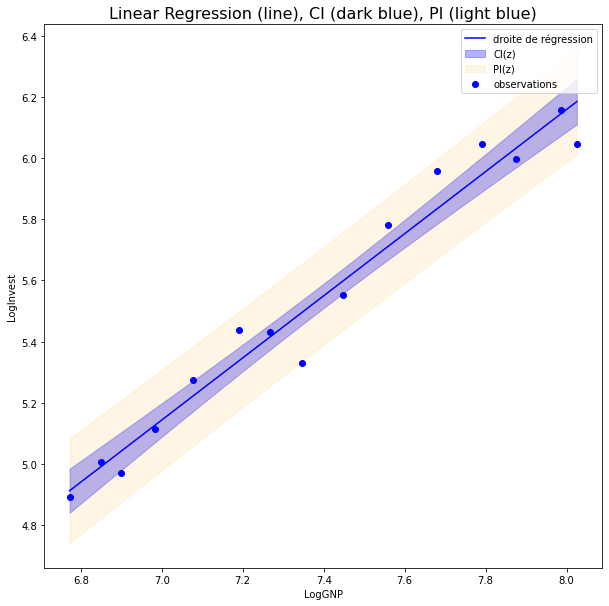

In [8]:
#QUESTION 6)

#cette fonction formalise le code écrit ci-dessus, notamment pour alléger le code nécessaire aux graphes plus bas
#on réutilisera cette même fonction pour la question 11
def borne(x, Z, alpha, kind="ci"):
  """renvoie les valeurs qui permettent de calculer les CI/PI"""
  if isinstance(x, (float,np.float32,np.float64)): #dans le cas unidimensionnel
    z = np.array((1, x)) #passage au format algébrique
    if kind.lower() == "ci": #cas CI
      return var_res**.5 * (z.T@np.linalg.inv(Z.T@Z)@z)**.5 * stats.t.ppf(1-alpha/2, n-Z.shape[1]) #formule plus haut
    elif kind.lower() == "pi": #cas PI, idem
      return var_res**.5 * (1 + z.T@np.linalg.inv(Z.T@Z)@z)**.5 * stats.t.ppf(1-alpha/2, n-Z.shape[1])    
  elif isinstance(x, np.ndarray): #dans le cas multidimensionnel
    z = np.insert(x,0,1) #ajoute l'intercept
    if kind.lower() == "ci": #cas CI
      return var_res**.5 * (z.T@np.linalg.inv(Z.T@Z)@z)**.5 * stats.t.ppf(1-alpha/2, n-Z.shape[1]) #formule plus haut
    elif kind.lower() == "pi": #cas PI, idem
      return var_res**.5 * (1 + z.T@np.linalg.inv(Z.T@Z)@z)**.5 * stats.t.ppf(1-alpha/2, n-Z.shape[1])    

droite = np.linspace(min(x),max(x),100) #espace linéaire entre le min et le max de loggnp
preds = droite*theta1+theta0 #prédictions sur cet espace (= droite des prédictions = droite de régression)
borneci = np.array(list(map(lambda x: borne(x, Z, .1, "ci"), droite))) #IC à 90% <=> alpha = .1
bornepi = np.array(list(map(lambda x: borne(x, Z, .1, "pi"), droite)))

c = "blue" #matplotlib alterne les couleurs, nous préférons la fixer pour faciliter la lisibilité

plt.figure(figsize=(10,10))
plt.plot(droite, preds, color=c, label="droite de régression") #droite de régression
plt.fill_between(droite, preds - borneci, preds + borneci, alpha = .3, color=c, label="CI(z)") #CI
plt.fill_between(droite, preds - bornepi, preds + bornepi, alpha = .1, color="orange", label="PI(z)") #PI
plt.scatter(data=df, x="loggnp", y="loginvest", color=c, label="observations") #observations
plt.xlabel("LogGNP")
plt.ylabel("LogInvest")
plt.title("Linear Regression (line), CI (dark blue), PI (light blue)", fontsize = 16)
plt.legend()
plt.show()

##QUESTION 7

In [9]:
#QUESTION 7)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x.reshape(-1,1), y)

print(f"Intercept et coefficients estimés par le modèle LinearRegression de sklearn : {model.intercept_:.5f}, {model.coef_[0]:.5f}")
print(f"R2 estimé par sklearn : {model.score(x.reshape(-1,1), y):.5f}")
print(f"LogInvestissement prédit par sklearn pour GNP = 1000 : {model.predict(np.log([[1000]]))[0]:.5f}")
print()
print("Ces résultats sont cohérents avec les estimations précédentes.")
print("Pour rappel :")
print(f"Intercept (beta0) et coefficient (beta1) estimés : {theta0:.5f}, {theta1:.5f}")
print(f"R2 précédent : {R2:.5f}")
print(f"LogInvestissement prédit pour GNP = 1000 : {y_1000:.5f}")

Intercept et coefficients estimés par le modèle LinearRegression de sklearn : -1.96359, 1.01528
R2 estimé par sklearn : 0.96276
LogInvestissement prédit par sklearn pour GNP = 1000 : 5.04972

Ces résultats sont cohérents avec les estimations précédentes.
Pour rappel :
Intercept (beta0) et coefficient (beta1) estimés : -1.96359, 1.01528
R2 précédent : 0.96276
LogInvestissement prédit pour GNP = 1000 : 5.04972


##QUESTION 8

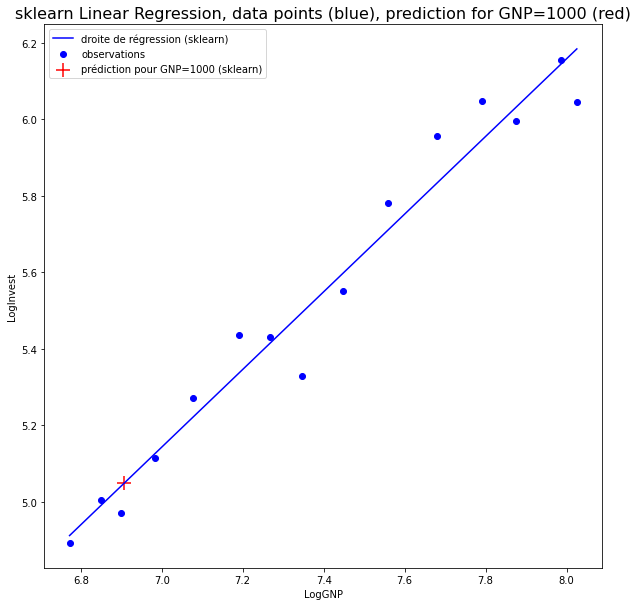

In [10]:
#QUESTION 8)

droite = np.linspace(min(x),max(x),100)
preds = model.predict(droite.reshape(-1,1)) #droite de régression du modèle sklearn

c = "blue"

plt.figure(figsize=(10,10))
plt.plot(droite, preds, color=c, label="droite de régression (sklearn)")
plt.scatter(data=df, x="loggnp", y="loginvest", color=c, label="observations")
plt.scatter(np.log(1000), model.predict(np.log([[1000]])), marker="+", color="red", s=200, label="prédiction pour GNP=1000 (sklearn)") #point de prédiction pour GNP = 1000
plt.xlabel("LogGNP")
plt.ylabel("LogInvest")
plt.title("sklearn Linear Regression, data points (blue), prediction for GNP=1000 (red)", fontsize=16)
plt.legend()
plt.show()

##QUESTION 9

In [11]:
#QUESTION 9)

Z = np.concatenate([np.ones(len(df)).reshape(-1,1),df[["loggnp","interest"]].values],axis=1)
y = df["loginvest"].values 

gram = Z.T@Z

print(f"La matrice de Gram non standardisée est de rang plein : {np.linalg.matrix_rank(gram)==Z.shape[1]}")

La matrice de Gram non standardisée est de rang plein : True


##QUESTION 10
Sachant que la matrice de Gram est de rang plein elle est invertible, sachant qu'elle est invertible on a :
$$
\widehat{\theta}=\left(Z^{\top} Z\right)^{-1} Z^{\top} Y
$$
On a aussi l'écart-type des coefficients d'après la proposition 4.(ii). du cours et par définition de la matrice de Covariance :
$$
\operatorname{Cov}(\widehat{\theta})=\hat{\sigma}^{2}\left(Z^{\top} Z\right)^{-1}
$$
$$
\Rightarrow \sqrt{Var\left(\hat{\theta}_{j}\right)}=\sqrt{\hat{\sigma}^{2}\left(Z^{T} Z\right)_{j j}^{-1}}
$$
Pour la variance des résidus, on utilisera la formule suivante (qui généralise à partir de la formule précédente vers le cas multidimensionnel), trouvée dans le cours (voir 3.3.1) :
$$
\hat{\sigma}^{2}=\sum_{i=1}^{n}\left(Y_{i}-z_{i}^{T} \widehat{\theta}_{n}\right)^{2} /(n-p-1)
$$
On réutilisera les formules précédentes pour la statistique de test et la p-valeur.

In [12]:
#QUESTION 10)

theta_hat = np.linalg.inv(gram)@Z.T@y #d'après ci-dessus

y_hat = theta_hat@Z.T

var_res = np.sum((y-y_hat)**2)/(n-Z.shape[1]) #estimation de la variance des résidus

R2 = np.sum((y_bar-y_hat)**2)/np.sum((y_bar-y)**2) #R2 == coefficient de détermination

std_theta_hat = np.diag(var_res * np.linalg.inv(gram))**.5 #d'après ci-dessus

t_hat = (n**.5/(np.diag(np.linalg.inv((Z.T@Z)/n))*var_res)**.5) * np.abs(theta_hat)

df_test = pd.DataFrame([theta_hat, std_theta_hat, t_hat, 2 * (stats.t.sf(t_hat, n-Z.shape[1]))], 
                       columns = ["intercept","theta1","theta2"], 
                       index = ["coefficients","std","t-hat","p-value"]).T

print(f"R2 de ce modèle : {R2:.5f}")
print("Coefficients estimés, écart-type des coefficients, valeur de la statistique de test et p-valeur pour chaque variable :")
print()
display(df_test.head())
print()
print("On peut rejeter l'hypothèse nulle Theta_k = 0 pour Theta_0 et Theta_1 avec p < .01 dans les deux cas.")
print("En revanche, on a p = .678 de rejeter à tort l'hypothèse nulle pour Theta_2.")

R2 de ce modèle : 0.96331
Coefficients estimés, écart-type des coefficients, valeur de la statistique de test et p-valeur pour chaque variable :



,coefficients,std,t-hat,p-value
intercept,-2.180455,0.662399,3.291753,6.438367e-03
theta1,1.051243,0.102061,10.300103,2.599517e-07
theta2,-0.006529,0.015344,0.425495,6.780071e-01



On peut rejeter l'hypothèse nulle Theta_k = 0 pour Theta_0 et Theta_1 avec p < .01 dans les deux cas.
En revanche, on a p = .678 de rejeter à tort l'hypothèse nulle pour Theta_2.


##QUESTION 11

In [13]:
#QUESTION 11)
#voir question 5)

z = np.array((1,np.log(1000),10))

y_new = theta_hat @ z.T

alpha = .001

bornea = var_res**.5 * (z.T@np.linalg.inv(Z.T@Z)@z)**.5 * stats.t.ppf(1-alpha/2, n-Z.shape[1])
borneb = var_res**.5 * (1+z.T@np.linalg.inv(Z.T@Z)@z)**.5 * stats.t.ppf(1-alpha/2, n-Z.shape[1])

print(f"Valeur prédite pour GNP = 1000, interest = 10 : {y_new:.5f}")
print()
print(f"On considère alpha = {alpha}.")
print(f"Intervalle de confiance de y* (la valeur prédite) :")
print(f"[y* ± {bornea:.5f}]")
print(f"<=> [{y_new-bornea:.5f}, {y_new+bornea:.5f}]")
print()
print(f"Intervalle de confiance de y (la valeur réelle) :")
print(f"[y ± {borneb:.5f}]")
print(f"<=> [{y_new-borneb:.5f}, {y_new+borneb:.5f}]")

Valeur prédite pour GNP = 1000, interest = 10 : 5.01598

On considère alpha = 0.001.
Intervalle de confiance de y* (la valeur prédite) :
[y* ± 0.37580]
<=> [4.64018, 5.39178]

Intervalle de confiance de y (la valeur réelle) :
[y ± 0.54218]
<=> [4.47380, 5.55816]


##QUESTION 12

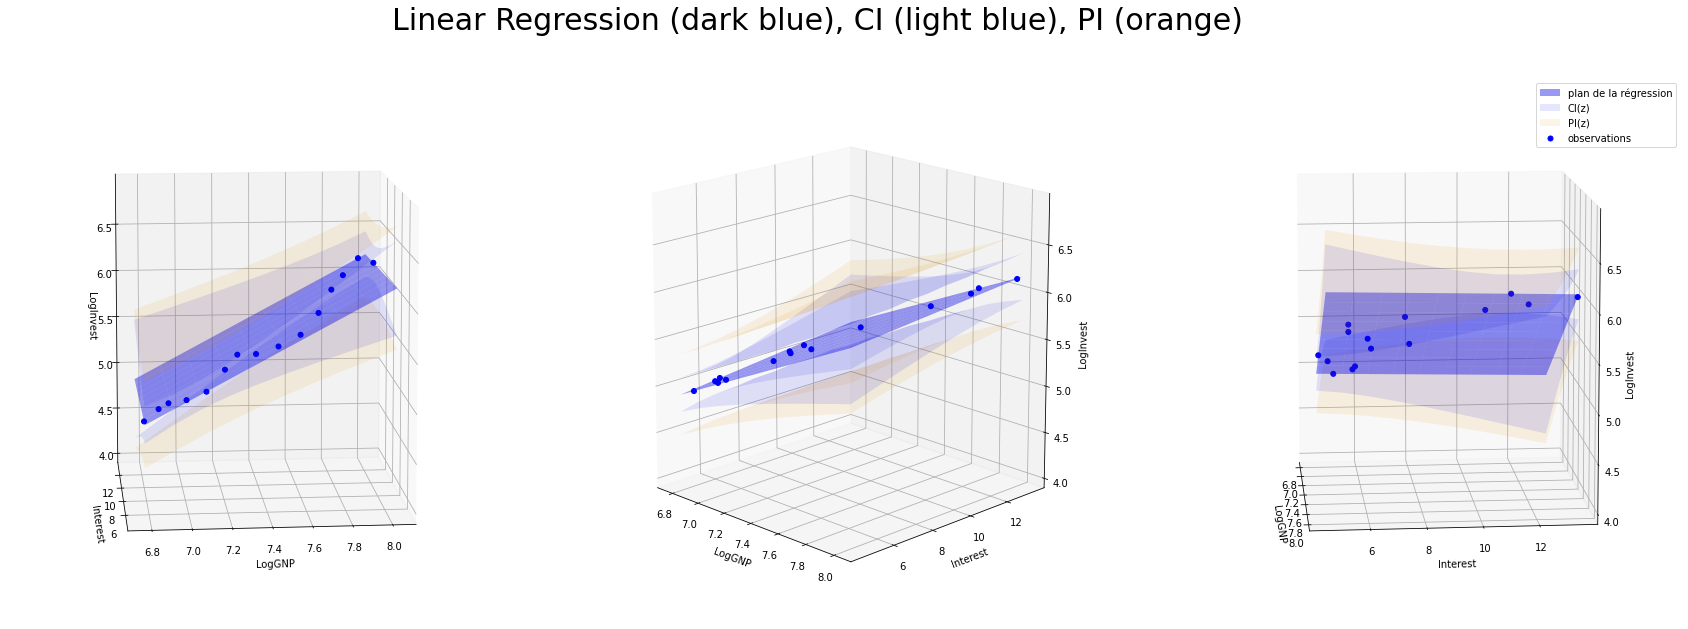

In [14]:
#QUESTION 12)
#voir question 6)

planx, plany = np.meshgrid(np.linspace(min(Z[:,1]),max(Z[:,1]),10), np.linspace(min(Z[:,2]),max(Z[:,2]),10)) #espace linéaire sur Z1 et Z2
preds = np.array([planx.ravel(),plany.ravel()]).T@theta_hat[1:]+theta_hat[0] #prédictions à partir de cet espace linéaire
preds = preds.reshape(planx.shape) #passage à la bonne shape pour visualisation
#CI à 99.9% <=> alpha = .001
borneci = np.array(list(map(lambda x: borne(x, Z, .001, "ci"), np.array([planx.ravel(),plany.ravel()]).T))).reshape(preds.shape) #calcul des bornes pour le CI à partir de l'espace linéaire
bornepi = np.array(list(map(lambda x: borne(x, Z, .001, "pi"), np.array([planx.ravel(),plany.ravel()]).T))).reshape(preds.shape) #idem PI

fig = plt.figure(figsize=(30,10))
views = [(10,-95),(16,-45),(10,-5)]
c="blue"
for i, view in enumerate(views): #on fait 3 graphes à l'air d'une boucle afin d'avoir plusieurs points de vue sur la scène en 3D
  ax = fig.add_subplot(1,3,i+1,projection='3d')
  s = ax.plot_surface(planx, plany, preds, alpha=.4, color=c, label="plan de la régression") #plan de la régression
  s._facecolors2d = s._facecolors3d #obligatoire pour avoir une légende correcte sur un 3D plot
  s._edgecolors2d = s._edgecolors3d
  s = ax.plot_surface(planx, plany, preds - borneci, alpha = .1, color=c, label="CI(z)") #CI, borne inf
  s._facecolors2d = s._facecolors3d
  s._edgecolors2d = s._edgecolors3d
  s = ax.plot_surface(planx, plany, preds + borneci, alpha = .1, color=c) #borne sup
  s = ax.plot_surface(planx, plany, preds - bornepi, alpha = .1, color="orange", label="PI(z)") #PI, borne inf
  s._facecolors2d = s._facecolors3d
  s._edgecolors2d = s._edgecolors3d
  s = ax.plot_surface(planx, plany, preds + bornepi, alpha = .1, color="orange") #borne sup
  s = ax.scatter(Z[:,1], Z[:,2], y_hat, alpha=1, color=c, s=25, label="observations") #données
  ax.set_xlabel("LogGNP")
  ax.set_ylabel("Interest")
  ax.set_zlabel("LogInvest")
  ax.view_init(*view)
fig.suptitle("Linear Regression (dark blue), CI (light blue), PI (orange)",fontsize=30)
plt.legend()
plt.show()

##QUESTION 13

In [15]:
#QUESTION 13)

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False) 
#on ne fit pas l'intercept car nous avons une colonne de 1 dans nos données qui permet automatiquement l'estimation de l'intercept dans les moindres carrés

model.fit(Z, y)

print(f"Intercept et coefficients estimés par le modèle LinearRegression de sklearn :\n {model.coef_}") 

print(f"R2 estimé par sklearn : {model.score(Z, y):.5f}")
print(f"LogInvestissement prédit par sklearn pour GNP = 1000, interest = 10 : {model.predict([np.array((1,np.log(1000),10))])[0]:.5f}")
print()
print("Ces résultats sont cohérents avec les estimations précédentes.")
print("Pour rappel :")
print()
display(df_test[["coefficients"]])
print()
print(f"R2 précédent : {R2:.5f}")
print(f"LogInvestissement prédit pour GNP = 1000, interest = 10 : {y_new:.5f}")

Intercept et coefficients estimés par le modèle LinearRegression de sklearn :
 [-2.18045473  1.05124269 -0.00652888]
R2 estimé par sklearn : 0.96331
LogInvestissement prédit par sklearn pour GNP = 1000, interest = 10 : 5.01598

Ces résultats sont cohérents avec les estimations précédentes.
Pour rappel :



,coefficients
intercept,-2.180455
theta1,1.051243
theta2,-0.006529



R2 précédent : 0.96331
LogInvestissement prédit pour GNP = 1000, interest = 10 : 5.01598
